--- Data Head (First 5 Rows) ---
   Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40   

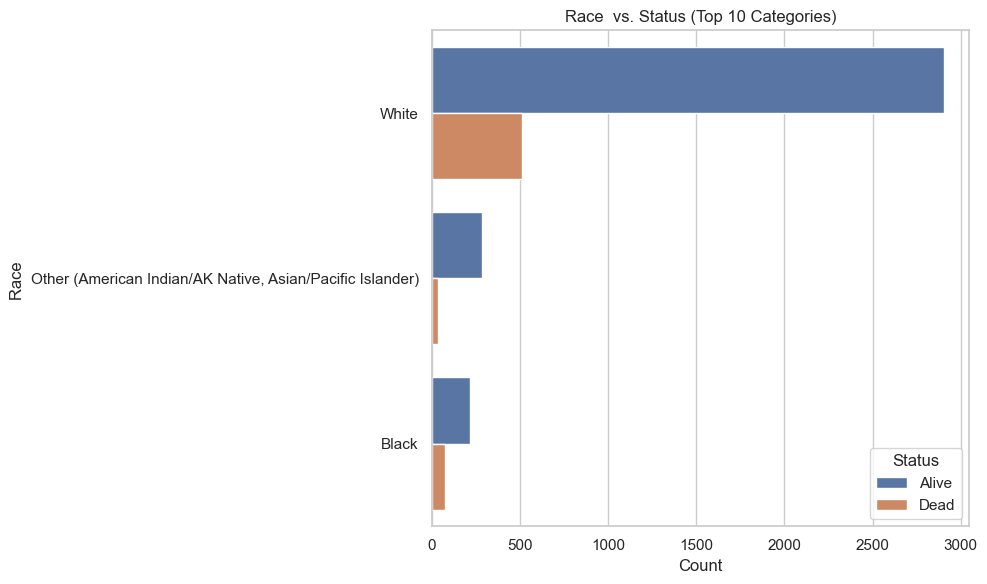


Value Counts for Marital Status:
Marital Status
Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: count, dtype: int64


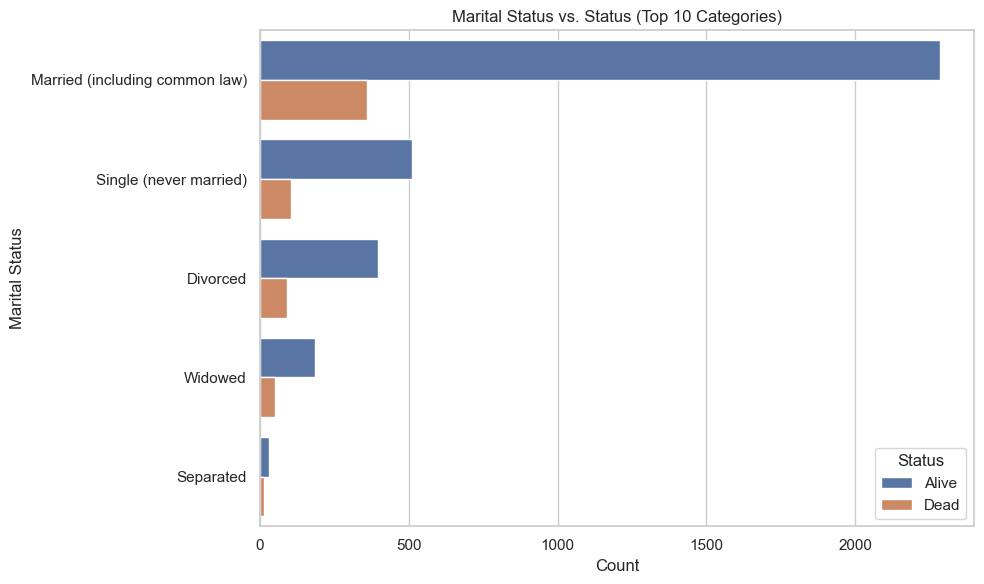


Value Counts for T Stage :
T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64


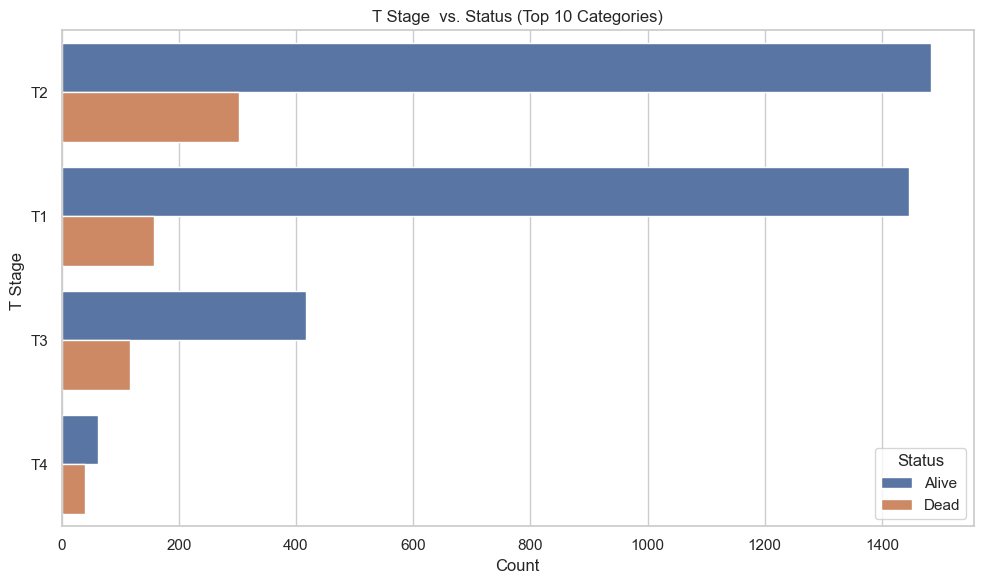


Value Counts for N Stage:
N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64


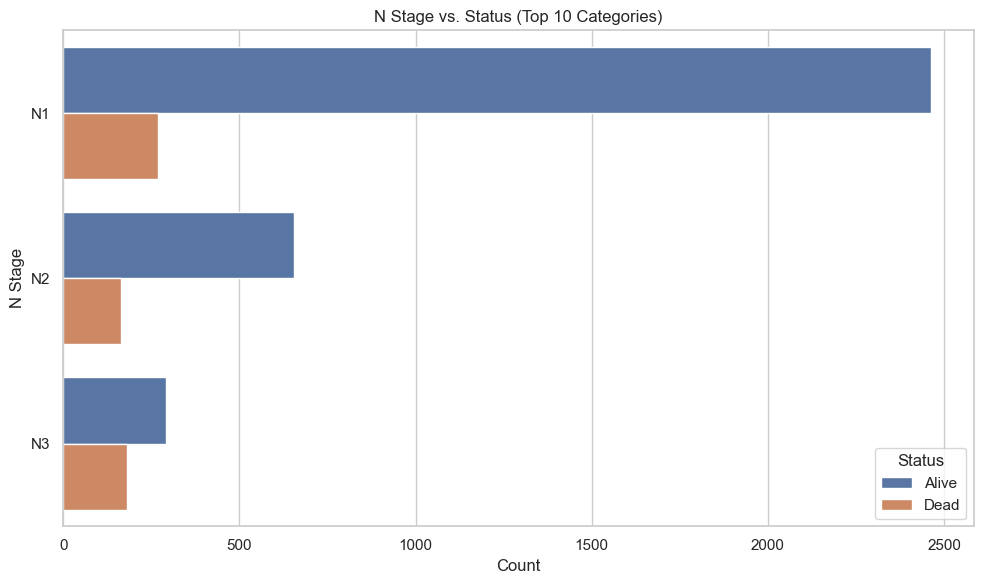


Value Counts for 6th Stage:
6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64


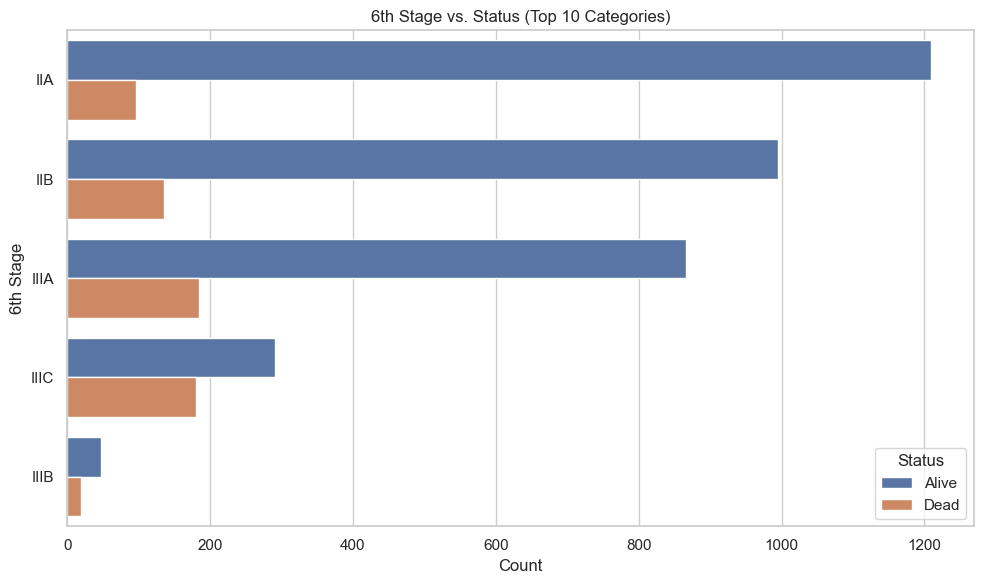


Value Counts for Grade:
Grade
Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: count, dtype: int64


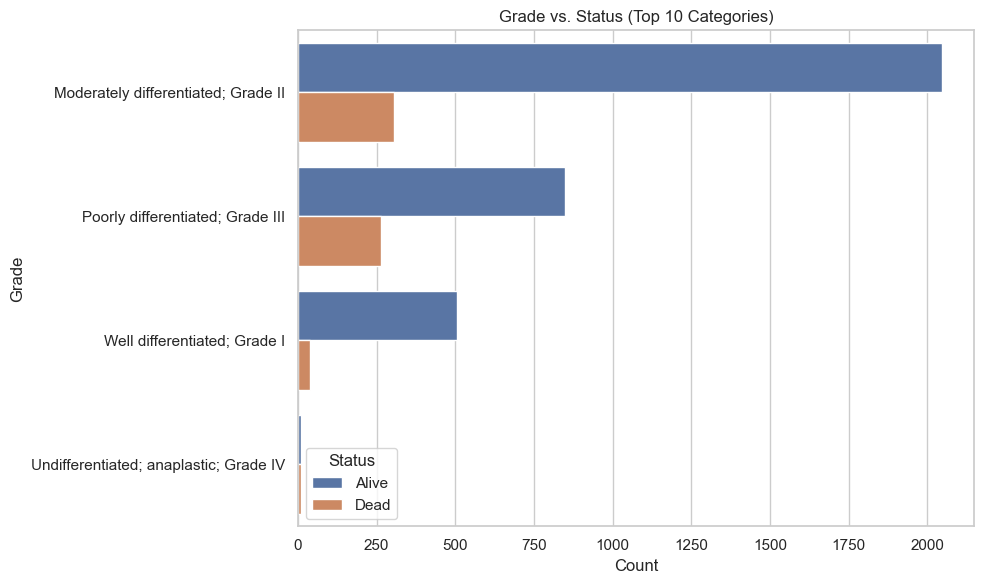


Value Counts for A Stage:
A Stage
Regional    3932
Distant       92
Name: count, dtype: int64


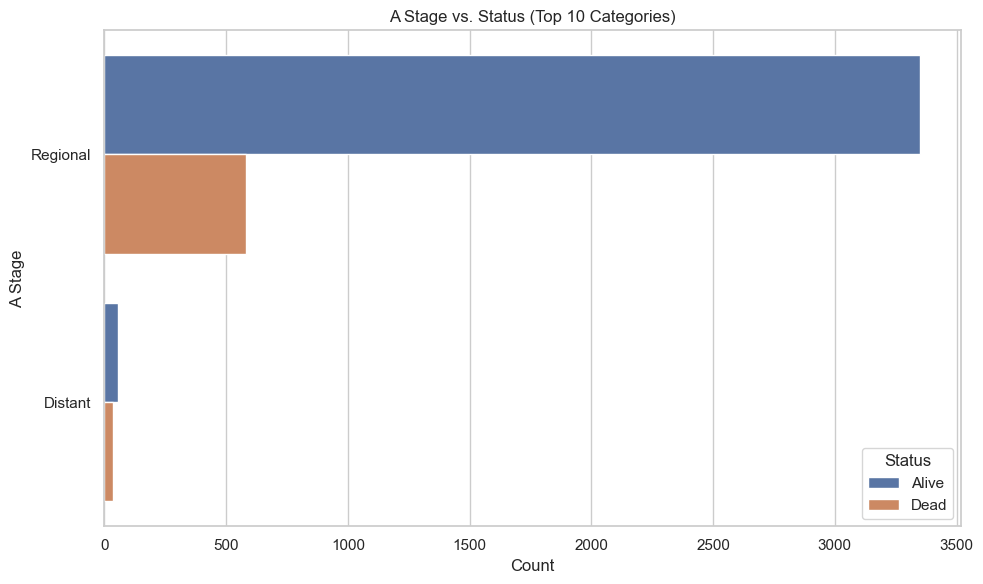


Value Counts for Estrogen Status:
Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64


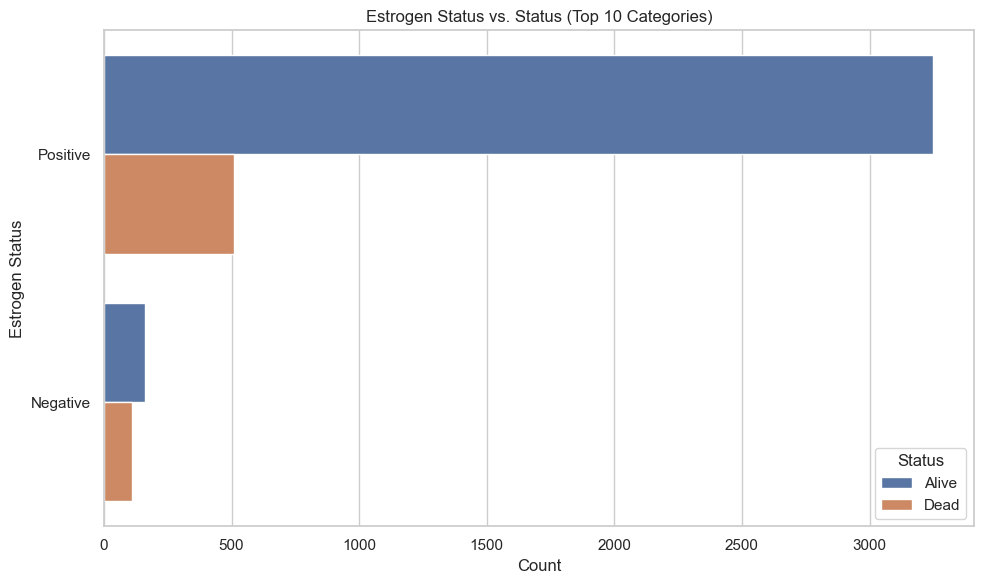


Value Counts for Progesterone Status:
Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


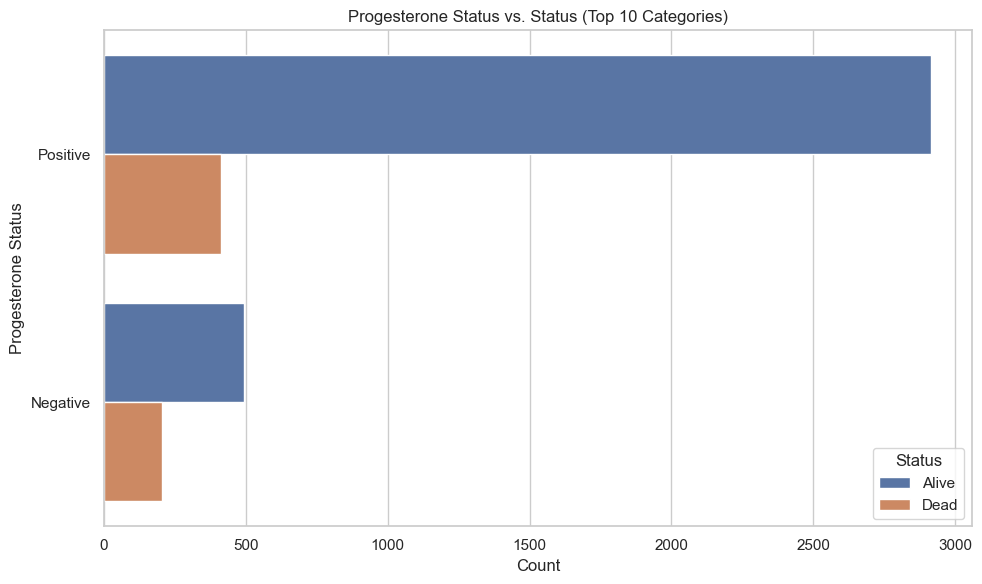

--- Analyzing Numerical Features vs. Status ---


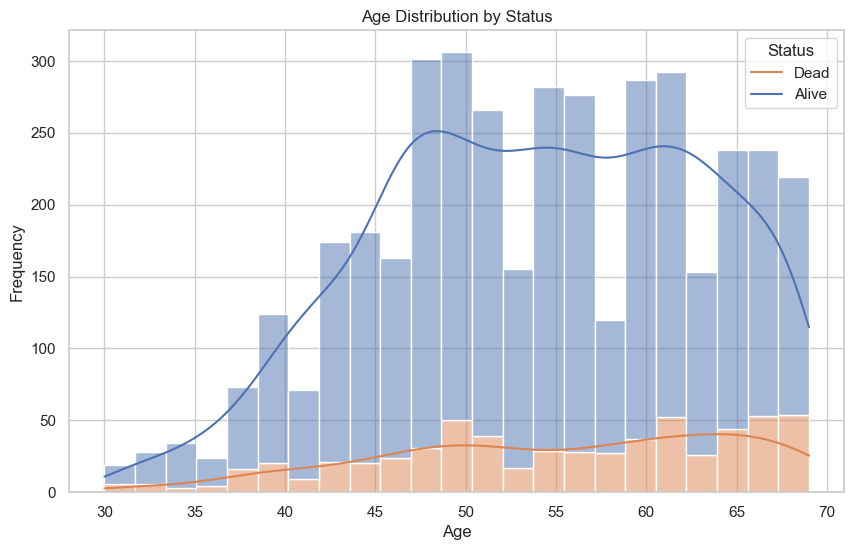

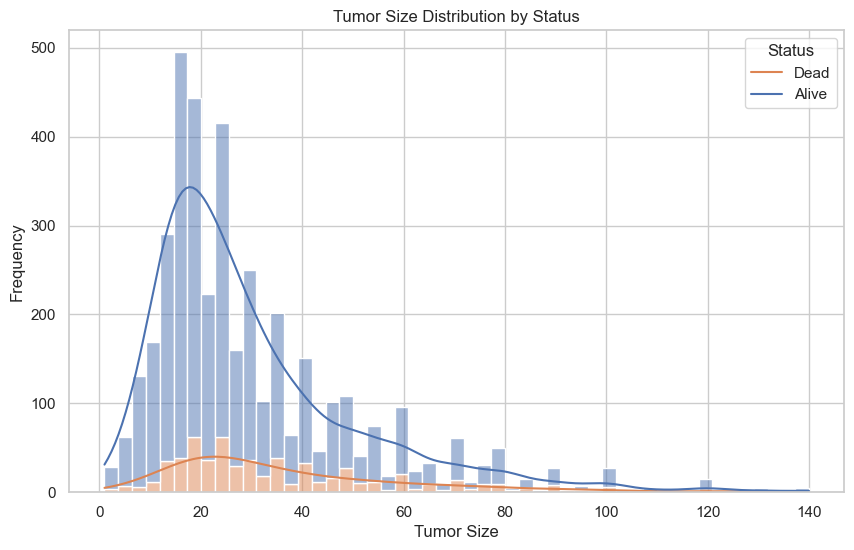

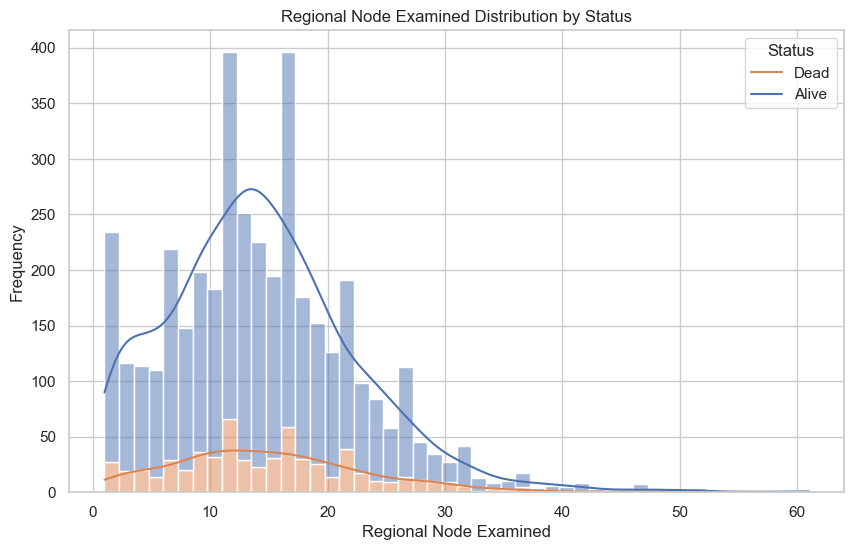

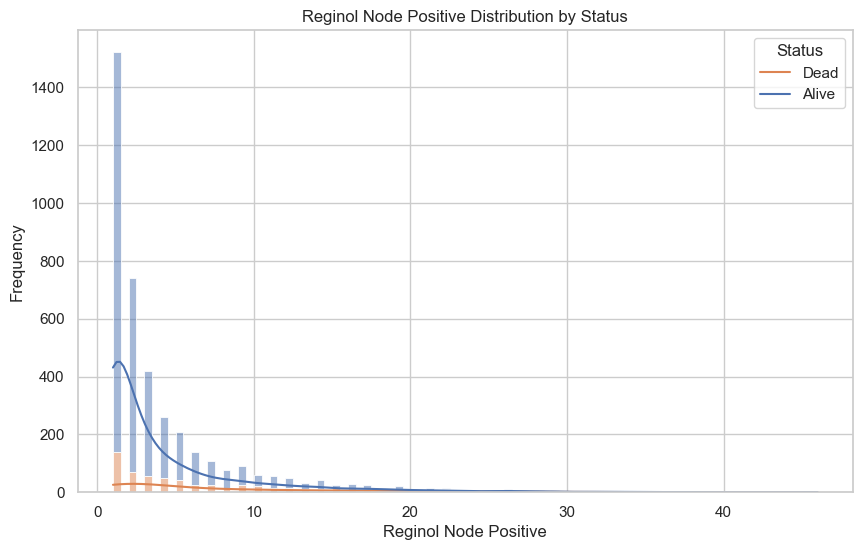

--- Analyzing Survival Months by Status ---


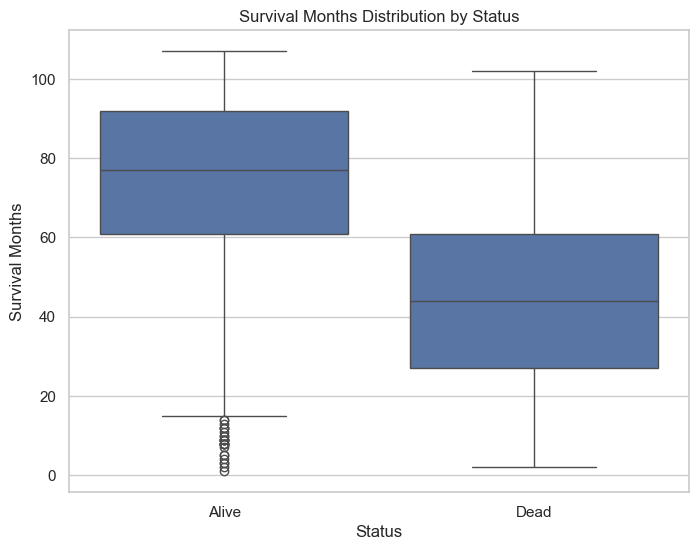

--- Correlation Heatmap (Numerical Features) ---


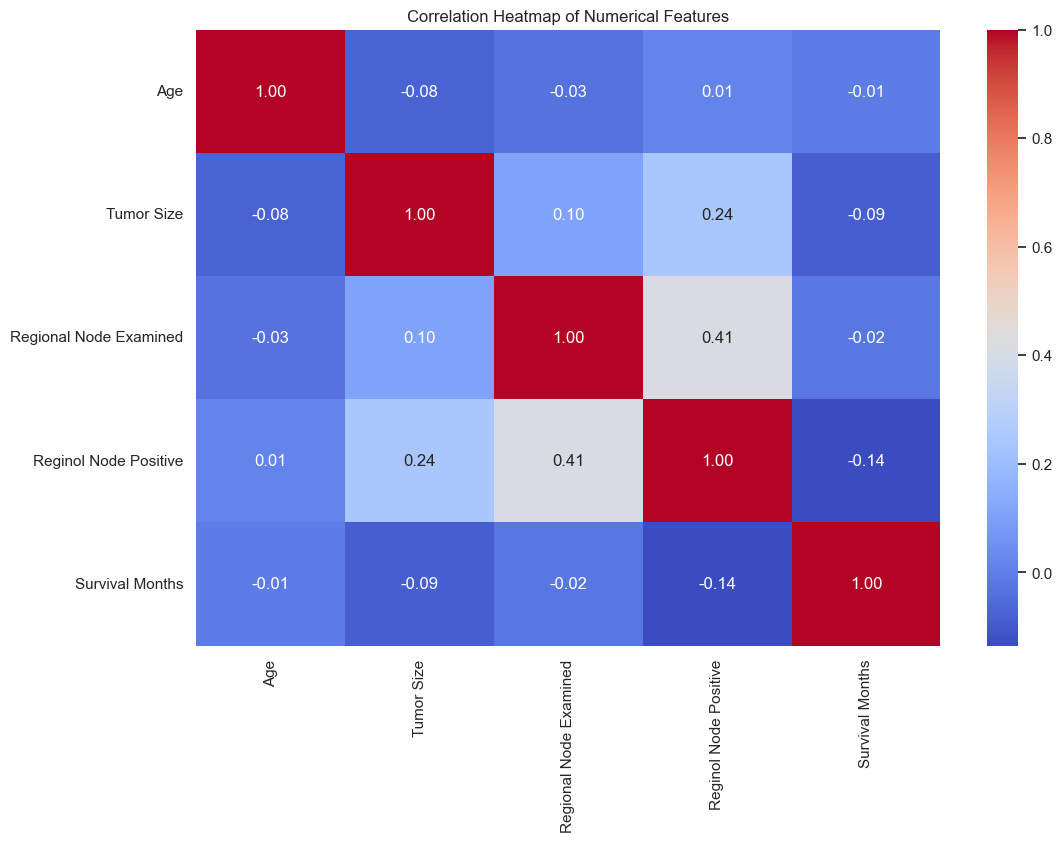


--- Initial EDA Complete ---


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# --- 1. Load Data ---
# Load the new SEER dataset
df = pd.read_csv("../SEER Breast Cancer Dataset.csv")

# --- 2. Initial Data Inspection ---
print("--- Data Head (First 5 Rows) ---")
print(df.head())
print("\n" + "=" * 80 + "\n")

print("--- Data Info (Data Types & Nulls) ---")
df.info()
# This is the corrected line:
print("\n" + "=" * 80 + "\n")

print("--- Descriptive Statistics (Numerical) ---")
# This shows stats for columns like 'Age', 'Tumor Size', etc.
print(df.describe())
print("\n" + "=" * 80 + "\n")

print("--- Descriptive Statistics (Categorical) ---")
# This shows counts, unique values, and top frequencies for text columns
print(df.describe(include="object"))
print("\n" + "=" * 80 + "\n")


# --- 4. Identify Feature Types ---
# We will analyze 'Survival Months' and 'Status' separately as they are outcomes.
target_col = "Status"
outcome_col = "Survival Months"

# Get all other columns as features
all_cols = df.columns.tolist()
# Note: Assuming 'Unnamed: 0' is an index column if it exists.
if "Unnamed: 0" in all_cols:
    all_cols.remove("Unnamed: 0")

# Separate numerical and categorical features for plotting
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

# Remove outcome/target columns from our feature lists
if target_col in categorical_features:
    categorical_features.remove(target_col)

if outcome_col in numerical_features:
    numerical_features.remove(outcome_col)

# Filter out columns with no valid data (all NaN or empty)
# Also exclude columns that start with "Unnamed" (except Unnamed: 0 which was already handled)
valid_numerical_features = []
for col in numerical_features:
    # Skip Unnamed columns (except Unnamed: 0 which was already removed)
    if col.startswith("Unnamed"):
        continue
    # Skip columns that are all NaN or have no valid data
    valid_count = df[col].notna().sum()
    if valid_count > 0:
        valid_numerical_features.append(col)
    else:
        print(f"Skipping {col}: all values are NaN")

numerical_features = valid_numerical_features

# Filter categorical features similarly
valid_categorical_features = []
for col in categorical_features:
    # Skip Unnamed columns
    if col.startswith("Unnamed"):
        continue
    # Skip columns that are all NaN or have no valid data
    valid_count = df[col].notna().sum()
    if valid_count > 0:
        valid_categorical_features.append(col)
    else:
        print(f"Skipping {col}: all values are NaN")

categorical_features = valid_categorical_features

print(f"Identified Numerical Features: {numerical_features}")
print(f"Identified Categorical Features: {categorical_features}")
print("\n" + "=" * 80 + "\n")


# --- 5. Categorical Feature Analysis 📊 ---
print("--- Analyzing Categorical Features vs. Status ---")
for col in categorical_features:
    # Print value counts to understand the categories
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts().head(10))  # Show top 10

    # Plot countplot
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df, y=col, hue=target_col, order=df[col].value_counts().index[:10]
    )
    plt.title(f"{col} vs. Status (Top 10 Categories)")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.legend(title="Status")
    plt.tight_layout()
    plt.show()


# --- 6. Numerical Feature Analysis 📈 ---
print("--- Analyzing Numerical Features vs. Status ---")
for col in numerical_features:
    # Additional validation: check if column has valid data
    if col not in df.columns:
        print(f"Skipping {col}: column not found")
        continue

    valid_data = df[col].dropna()
    if len(valid_data) == 0:
        print(f"Skipping {col}: no valid data")
        continue

    try:
        # Check if column has enough unique values for KDE
        unique_count = valid_data.nunique()
        use_kde = unique_count > 1  # Only use KDE if more than 1 unique value

        plt.figure(figsize=(10, 6))
        if use_kde:
            sns.histplot(data=df, x=col, hue=target_col, kde=True, multiple="stack")
        else:
            sns.histplot(data=df, x=col, hue=target_col, kde=False, multiple="stack")
        plt.title(f"{col} Distribution by Status")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend(title="Status", labels=["Dead", "Alive"])
        plt.show()
    except Exception as e:
        print(f"Error plotting {col}: {e}")
        # Try without KDE if KDE fails
        try:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=df, x=col, hue=target_col, kde=False, multiple="stack")
            plt.title(f"{col} Distribution by Status")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.legend(title="Status", labels=["Dead", "Alive"])
            plt.show()
        except Exception as e2:
            print(f"Could not plot {col}: {e2}")
            continue


# --- 7. Survival Months Analysis ---
print("--- Analyzing Survival Months by Status ---")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=target_col, y=outcome_col)
plt.title("Survival Months Distribution by Status")
plt.xlabel("Status")
plt.ylabel("Survival Months")
plt.show()

# --- 8. Correlation Heatmap (Numerical Features Only) ---
print("--- Correlation Heatmap (Numerical Features) ---")
plt.figure(figsize=(12, 8))
# We include 'Survival Months' here to see its correlation with other numerics
numeric_corr_df = df[numerical_features + [outcome_col]]
corr_matrix = numeric_corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

print("\n--- Initial EDA Complete ---")

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# --- 1. Load Data ---
print("Loading data...")
df = pd.read_csv("../SEER Breast Cancer Dataset.csv")

# Drop all 'Unnamed' columns (index columns or empty columns)
unnamed_cols = [col for col in df.columns if col.startswith("Unnamed")]
if unnamed_cols:
    df = df.drop(unnamed_cols, axis=1)
    print(f"Dropped {len(unnamed_cols)} Unnamed column(s): {unnamed_cols}")

# --- 2. Define Target and Features ---

# Convert the target 'Status' to a binary format
# 'Alive' = 0 (the 'negative' class)
# 'Dead' = 1 (the 'positive' class)
df["Status"] = df["Status"].map({"Alive": 0, "Dead": 1})

# Define our target (y)
y = df["Status"]

# Define our features (X)
# We MUST drop 'Status' and 'Survival Months'.
# 'Survival Months' is an outcome, not a predictor. Including it would cause data leakage.
X = df.drop(["Status", "Survival Months"], axis=1)

print("Original data shape:", X.shape)
print(f"Target variable 'Status' defined (0=Alive, 1=Dead).")
print("Dropped 'Survival Months' to prevent data leakage.")

# --- 3. Identify Feature Types ---
# Automatically separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include="object").columns.tolist()

print(f"\nIdentified {len(numerical_cols)} numerical features:")
print(numerical_cols)
print(f"\nIdentified {len(categorical_cols)} categorical features:")
print(categorical_cols)

# --- 4. Create Preprocessing Pipelines ---

# Numerical pipeline:
# Step 1: Impute missing values with the median (robust to outliers)
# Step 2: Scale data using StandardScaler (mean=0, std=1)
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Categorical pipeline:
# Step 1: Impute missing values with the most frequent category
# Step 2: One-hot encode the categories. 'handle_unknown='ignore''
#          prevents errors if the test set has a rare category.
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

# --- 5. Combine Pipelines with ColumnTransformer ---
# This applies the correct transformer to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="passthrough",  # Keep any columns not specified (just in case)
)

# --- 6. Split Data into Training and Test Sets ---
# We split BEFORE preprocessing to prevent data leakage
# stratify=y ensures the train and test sets have the same proportion of
# 'Alive' and 'Dead' samples as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducible results
    stratify=y,  # Essential for classification
)

print(
    f"\nData split into training set (n={len(X_train)}) and test set (n={len(X_test)})."
)

# --- 7. Apply Preprocessing ---
# .fit_transform() on the training data: learns the scalers and encoders
# .transform() on the test data: applies the learned transformations
print("Applying preprocessing pipelines...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 8. Create Processed DataFrames ---
# Get the new feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out()

# Convert the processed numpy arrays back into DataFrames
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

print("Preprocessing complete.")
print("\n--- Processed Training Data (Head) ---")
print(X_train_df.head())
print("\n--- Processed Training Data (Info) ---")
X_train_df.info()

# --- 9. Save Processed Data for Modeling ---
# Save the processed data and the corresponding targets (y)
# Save to the Notebooks directory where this notebook is located
import os

save_dir = (
    os.path.dirname(os.path.abspath("__file__"))
    if "__file__" in globals()
    else os.getcwd()
)

X_train_df.to_csv("X_train_processed.csv", index=False)
X_test_df.to_csv("X_test_processed.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("\nProcessed training and testing data saved to CSV files:")
print(" - X_train_processed.csv")
print(" - X_test_processed.csv")
print(" - y_train.csv")
print(" - y_test.csv")
print(f"\nFiles saved to: {os.getcwd()}")
print("\nYou are now ready for modeling!")

Loading data...
Dropped 1 Unnamed column(s): ['Unnamed: 3']
Original data shape: (4024, 13)
Target variable 'Status' defined (0=Alive, 1=Dead).
Dropped 'Survival Months' to prevent data leakage.

Identified 4 numerical features:
['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']

Identified 9 categorical features:
['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

Data split into training set (n=3219) and test set (n=805).
Applying preprocessing pipelines...
Preprocessing complete.

--- Processed Training Data (Head) ---
      num__Age  num__Tumor Size  num__Regional Node Examined  \
2140  0.010042        -0.403623                     1.681719   
1883 -1.555896        -0.823673                     0.815586   
554   0.345600        -0.263606                     0.196920   
1201  1.464127        -1.010362                     1.186786   
2836  1.016716         0.996544                     1.5

Loading preprocessed data...
Data loaded successfully.
X_train shape: (3219, 34)
y_train shape: (3219,)

--- Training Logistic Regression ---

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

   Alive (0)       0.86      0.98      0.92       682
    Dead (1)       0.59      0.13      0.21       123

    accuracy                           0.85       805
   macro avg       0.73      0.56      0.57       805
weighted avg       0.82      0.85      0.81       805


--- Training k-NN (k=5) ---

Classification Report for k-NN (k=5):

              precision    recall  f1-score   support

   Alive (0)       0.86      0.97      0.91       682
    Dead (1)       0.45      0.15      0.23       123

    accuracy                           0.84       805
   macro avg       0.66      0.56      0.57       805
weighted avg       0.80      0.84      0.81       805


--- Training SVM ---

Classification Report for SVM:

              precision    reca

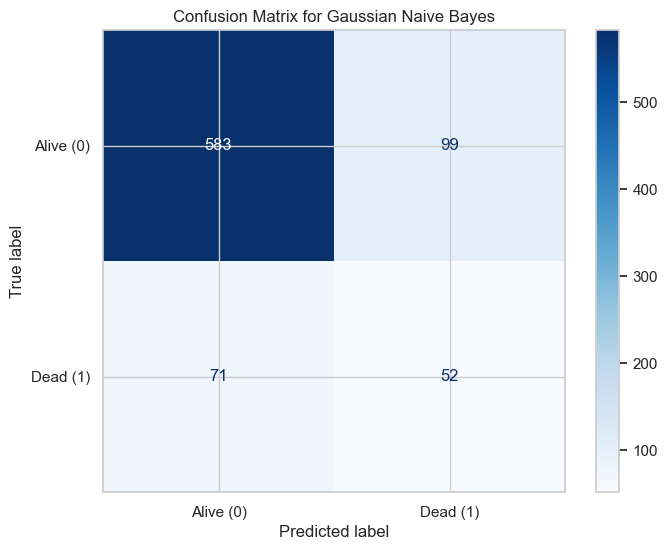


--- Initial Model Training Complete ---


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Set plot style
sns.set(style="whitegrid")

# --- 1. Load Preprocessed Data ---
print("Loading preprocessed data...")
try:
    X_train = pd.read_csv("X_train_processed.csv")
    y_train = pd.read_csv("y_train.csv").iloc[:, 0]  # Use .iloc to get it as a Series
    X_test = pd.read_csv("X_test_processed.csv")
    y_test = pd.read_csv("y_test.csv").iloc[:, 0]  # Use .iloc to get it as a Series

    print("Data loaded successfully.")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print(
        "Please make sure the preprocessed files (X_train_processed.csv, etc.) are in the same directory."
    )
    # Exit or raise error if files not found
    exit()

# --- 2. Initialize Baseline Models ---
# Create a dictionary of models to train
# We use random_state=42 for reproducibility
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "k-NN (k=5)": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),  # probability=True for ROC-AUC
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

# --- 3. Train and Evaluate Models ---
results_list = []

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Get prediction probabilities for ROC-AUC
    # We check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 ('Dead')
    else:
        y_prob = model.decision_function(X_test)

    # Calculate metrics
    # Note: For 'Dead' (class 1), which is our positive class
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store results in a dictionary
    model_results = {
        "Model": name,
        "Accuracy": accuracy,
        "Precision (for 1:Dead)": precision,
        "Recall (for 1:Dead)": recall,
        "F1-Score (for 1:Dead)": f1,
        "ROC-AUC": roc_auc,
    }

    results_list.append(model_results)

    # Print a detailed classification report for each model
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=["Alive (0)", "Dead (1)"]))

# --- 4. Display Final Performance Summary ---
print("\n" + "=" * 80)
print("           MODEL PERFORMANCE SUMMARY (Baseline Models)")
print("=" * 80)

# Convert the results list to a DataFrame for easy viewing
results_df = pd.DataFrame(results_list)

# Sort by Recall (most important for minimizing false negatives) and F1-Score
results_df = results_df.sort_values(
    by=["Recall (for 1:Dead)", "F1-Score (for 1:Dead)"], ascending=False
)
results_df = results_df.set_index("Model")

# Print the formatted table
print(results_df.to_string(float_format="{:,.4f}".format))

# --- 5. (Optional) Visualize Best Model's Confusion Matrix ---
print("\n" + "=" * 80)
print("         CONFUSION MATRIX FOR BEST MODEL")
print("=" * 80)

# Get the name of the best model (top row of our sorted DataFrame)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f"Plotting Confusion Matrix for: {best_model_name}")

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["Alive (0)", "Dead (1)"],
    cmap="Blues",
    ax=ax,
)
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

print("\n--- Initial Model Training Complete ---")

In [ ]:
# 